___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Метод опорных векторов (англ. SVM - support vector machine) 

**Замечание: в этом примере мы исследуем сам алгоритм, поэтому мы пропустим масштабирование и разбиение на обучающий и тестовый набор данных. Вместо этого мы посмотрим различные параметры, с помощью которых можно менять метод SVM (проще всего показать результаты с помощью визуализации).**

[Ссылка на отличную статью по SVM (англ.)](http://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=4448154647BC7B10C991CEF2236BBA38?doi=10.1.1.114.4288&rep=rep1&type=pdf)


## Метод опорных векторов -  классификация

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Данные

Мы будем изучать следующий сценарий - медицинское исследование, в котором мышам с наличием вируса дают различные дозы двух лекарств. Через две недели смотрят, остался ли ещё вирус или нет. Цель - создать модель классификации, которая по двум измерениям дозы лекарств будет предсказывать, есть или нет вирус у мыши. 

Вы увидите, что группы хорошо отделимы друг от друга - данные специально подобраны таким образом, чтобы исследовать поведение модели SVM с различными параметрами.

In [2]:
df = pd.read_csv("./data/mouse_viral_study.csv")

Мышам дали 2 вида лекарств (в милилитрах) и через некоторе время посмотрели на результат

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [4]:
df.columns

Index(['Med_1_mL', 'Med_2_mL', 'Virus Present'], dtype='object')

## Классы

<Axes: xlabel='Med_1_mL', ylabel='Med_2_mL'>

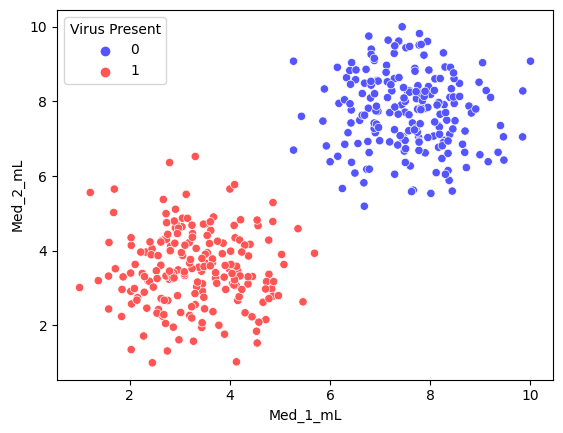

In [8]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',
                data=df,palette='seismic')

## Разделяющая гиперплоскость

Цель SVM - создать наилучшую разделяющую гиперплоскость. В двумерном пространстве это просто линия.

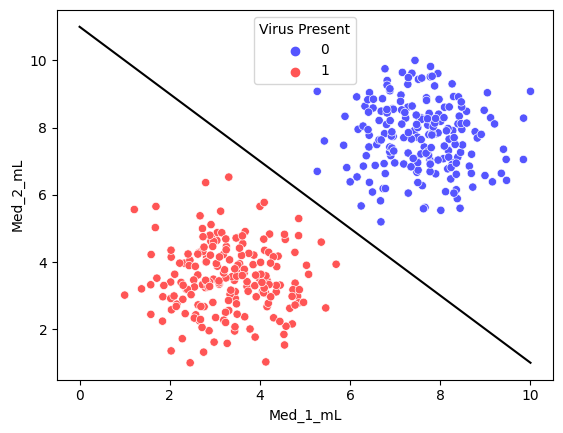

In [9]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',palette='seismic',data=df)

# МCоздадим разделяющую гиперплоскость (в двумерном случае - линия)

x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x + b
plt.plot(x,y,'black')

## Метод опорных векторов (SVM - Support Vector Machine)

In [11]:
from sklearn.svm import SVC # Support Vector Classifier

In [ ]:
help(SVC)
# Параметр регуляризации "С" - отвечает объем допускаемых ошибочных решений (точек) 
# kernel - различные ядра

**Замечание: в этом примере мы будем исследовать сам алгоритм, так что пока мы пропустим масштабирование данных и разбиение на обучающий и тестовый наборы данных.**

Не разбиваем на обучающую и тестовую выборки

In [13]:
y = df['Virus Present']
X = df.drop('Virus Present',axis=1) 

In [ ]:
# Наиболее лучший - rbf - радиальная базисная ф-ция (по умолчанию, но надо включать тогда 
# параметр gamma=)
# Параметр "С" -реверсивный, т.е. чем большим мы его назначаем, тем меньшую 
# долю ошибкок допускаем
model = SVC(kernel='linear', C=1000)
model.fit(X, y)

SVC(C=1000, kernel='linear')

In [16]:
# Импортируем ф-цию из вспомогательного "svm_margin_plot.py"-файла
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
from svm_margin_plot import plot_svm_boundary

c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


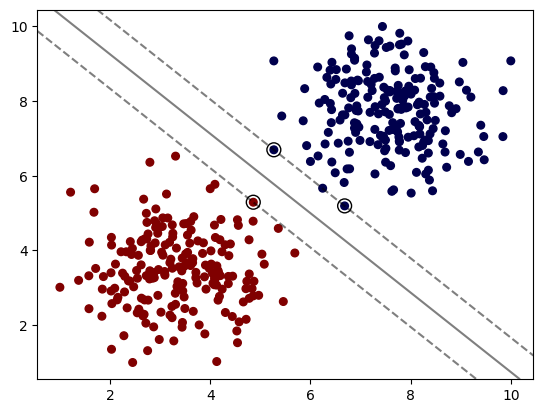

In [17]:
plot_svm_boundary(model,X,y)

## Гиперпараметры

### C

Параметр регуляризации. Сила регуляризации **обратно** пропорциональна величине C. Параметр должен быть строго положительным. В качестве штрафа применяется штраф "squared l2 penalty".

In [18]:
model = SVC(kernel='linear', C=0.05)
model.fit(X, y)

SVC(C=0.05, kernel='linear')

c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


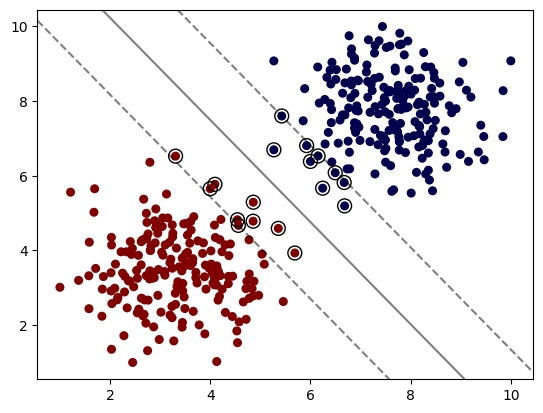

In [19]:
plot_svm_boundary(model,X,y)

### Ядро (Kernel)

[Выбираем ядро](https://stats.stackexchange.com/questions/18030/how-to-select-kernel-for-svm?rq=1)

#### rbf - [Radial Basis Function](https://en.wikipedia.org/wiki/Radial_basis_function_kernel)


Обучение модели SVM с использованием ядра "Radial Basis Function (RBF) kernel" предполагает наличие двух параметров: C и gamma. Параметр C является общим для всех ядер SVM, с его помощью настраивается баланс между неправильной классификацией обучающих примеров и простотой разделяющей поверхности. Маленькие значения C делают поверхность гладкой. Большие значения C стараются правильно классифицировать все обучающие примеры. Параметр gamma определяет то, какое влияние может оказывать отдельный обучающий пример. Чем больше значение gamma, тем ближе должны быть другие примеры, чтобы они тоже влияли на результат.

c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


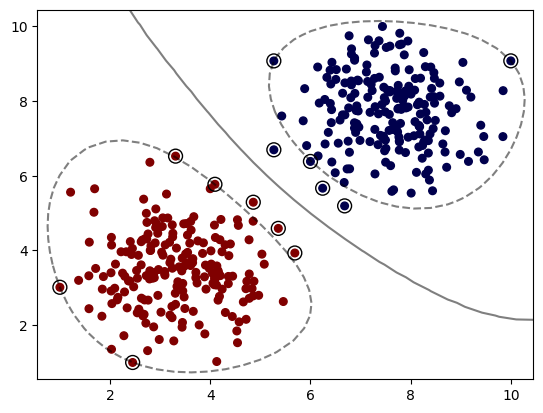

In [20]:
model = SVC(kernel='rbf', C=1)
model.fit(X, y)
plot_svm_boundary(model,X,y)

c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


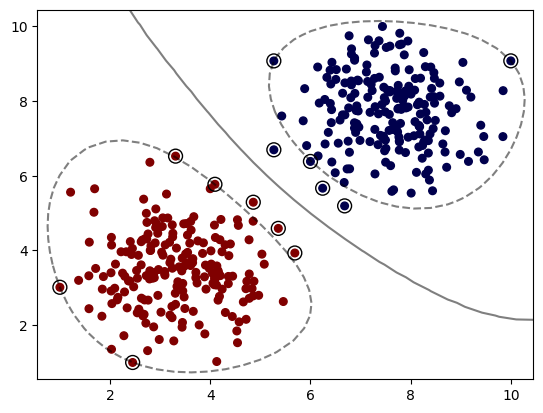

In [24]:
model = SVC(kernel='rbf', C=1, gamma='scale')
model.fit(X, y)
plot_svm_boundary(model,X,y)

c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


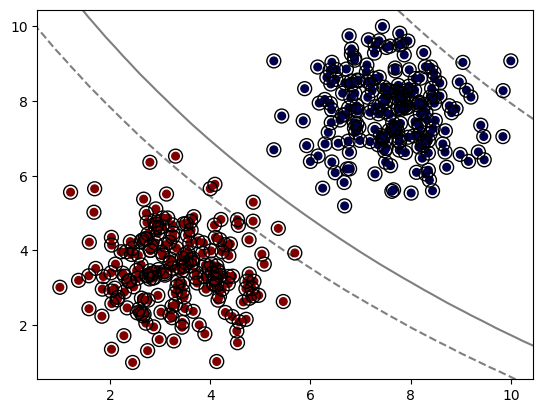

In [25]:
model = SVC(kernel='sigmoid')
model.fit(X, y)
plot_svm_boundary(model,X,y)

#### degree (только для полиноминальных ядер)

Степень полиноминальной функции ядра ('poly').
Игнорируется всеми другими ядрами.

c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


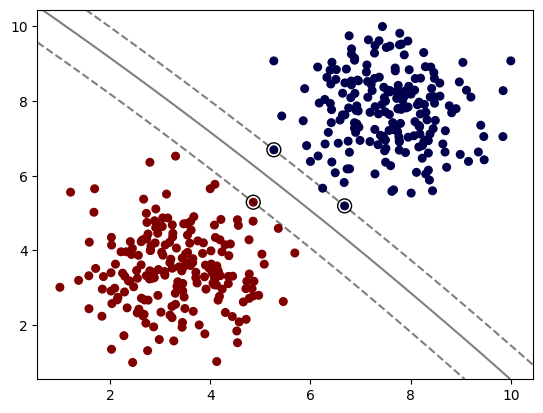

In [27]:
model = SVC(kernel='poly', C=1,degree=3)
model.fit(X, y)
plot_svm_boundary(model,X,y)

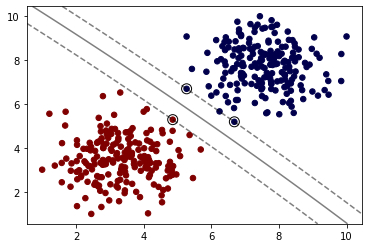

In [18]:
model = SVC(kernel='poly', C=1,degree=2)
model.fit(X, y)
plot_svm_boundary(model,X,y)

### gamma

gamma : {'scale', 'auto'} или float, по умолчанию='scale'  
    Коэффициент ядра для 'rbf', 'poly' или 'sigmoid'.

    - если ``gamma='scale'`` (по умолчанию), то в качестве значения гамма используется
      1 / (n_features * X.var()),
    - если 'auto', то используется значение 1 / n_features.

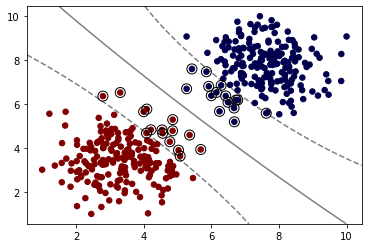

In [19]:
model = SVC(kernel='rbf', C=1,gamma=0.01)
model.fit(X, y)
plot_svm_boundary(model,X,y)

## Поиск по сетке

Имейте ввиду, что в этом простом примере классы легко отделялись друг от друга. Это значит, что различные варианты модели могут давать 100% точность, и поиск по сетке может быть излишним.

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf']}
grid = GridSearchCV(svm,param_grid)

In [31]:
# Опять же, мы не делаем разбиение на обучающий и тестовый наборы данных
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [32]:
# точность 100% (как и ожидалось)
grid.best_score_

1.0

In [33]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

Здесь мы вспомнили процесс поиска по сетке - это пригодится в реальных примерах, например в самостоятельном упражнении в конце этого раздела, где Вы будете разбивать данные на обучающий и тестовый наборы данных, и вычислять метрики оценки модели.